<a href="https://colab.research.google.com/github/Tainaquz/Desafios-Dio.me-Bootcamp-BairesDevp-Machine-Learning-Bai/blob/main/detec%C3%A7%C3%A3o_de_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

pasta = "/content/drive/MyDrive/Bootcamp Bairesdev/Friends/Train"  # Substitua pelo caminho correto

# Parâmetros
img_size = 160
images = []
labels = []
subpastas = [f for f in os.listdir(pasta) if os.path.isdir(os.path.join(pasta, f))]
for subpasta in subpastas:
    caminho_subpastas = os.path.join(pasta, subpasta)
    for file_name in os.listdir(caminho_subpastas):
        if file_name.endswith(".jpg"):
            labels.append(subpasta)
            img_path = os.path.join(caminho_subpastas, file_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
images = np.array(images) / 255.0
labels = np.array(labels)
unique_labels = sorted(set(labels))
print(f"Rótulos únicos encontrados: {unique_labels}")

label_to_index = {name: idx for idx, name in enumerate(unique_labels)}
print(f"Mapeamento de rótulos para índices: {label_to_index}")

indices = np.array([label_to_index[label] for label in labels])
one_hot_labels = to_categorical(indices, num_classes=len(unique_labels))
X_train, X_val, y_train, y_val = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)



Rótulos únicos encontrados: ['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross']
Mapeamento de rótulos para índices: {'Chandler': 0, 'Joey': 1, 'Monica': 2, 'Phoebe': 3, 'Rachel': 4, 'Ross': 5}


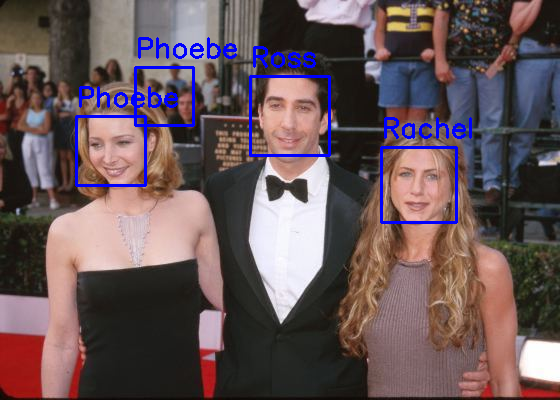

In [70]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

def reconhecimento_facial(pasta):
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    faces = []
    labels = []
    label_map = {}
    label = 0
    for nome_personagem in os.listdir(pasta):
        nome_pasta = os.path.join(pasta, nome_personagem)
        if os.path.isdir(nome_pasta):
            for image_name in os.listdir(nome_pasta):
                if image_name.endswith('.jpg'):
                    image_path = os.path.join(nome_pasta, image_name)
                    image = cv2.imread(image_path)
                    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
                    faces_detectada = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
                    for (x, y, w, h) in faces_detectada:
                        face = gray[y:y+h, x:x+w]
                        faces.append(face)
                        labels.append(label)
            label_map[label] = nome_personagem
            label += 1
    recognizer.train(faces, np.array(labels))
    return recognizer, label_map
def recognize_faces(image_path, recognizer, label_map):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        label, confidence = recognizer.predict(face)
        name = label_map.get(label, "Desconhecido")
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Caminho para as imagens de treino
pasta = "/content/drive/MyDrive/Bootcamp Bairesdev/Friends/Train/"

# Treinar o modelo de reconhecimento facial
recognizer, label_map = reconhecimento_facial(pasta)

# Testar o reconhecimento em uma imagem
recognize_faces("/content/drive/MyDrive/Bootcamp Bairesdev/Friends/Test/all (29).jpg", recognizer, label_map)


